

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Intro to Classification + KNN
_Dr. Junaid Qazi, PhD_

### KNN CODEALONG OBJECTIVES
*In this notebook, we will:*
- Quickly review types of ML problem
- Implement a visualization of KNN on some made-up data 
- Deploy the sklearn implementation of KNN on coded data (Synthetic dataset provided - *owner Dr. Junaid Qazi*)
- Deploy the sklearn implementation of KNN on the Iris dataset together
- And deploy KNN on the Wisconsin Breast Cancer dataset individually -- Try this, it's optional
---

## Classification Review

![](https://snag.gy/0Jns5x.jpg)

Classifcation methods in machine learning are **supervised methods**.  That is, our training data observations have a discrete or categorical label designating their class.  

**Classification is different than regression** (with continuous values) because we are now **predicting classes** / labels.  This can be thought of as a discrimination problem, modelling the differences or similarities between groups. 

We also assess our models differently in classification than in regression.  Generally, we are concerned with if we identified anything incorrectly, completely missed the mark, or predicted correctly on our test set during cross validation.  There are a few different things we usually talk about and look at when it pertains to classification related to these ideas such as **accuracy**, **recall**, **precision**, **F-measures**, **class imbalance**, and **Reciever Operating Characteristic (ROC)**.

For our purposes right now, **we're only looking at accuracy** which is:

## $$ \frac{True Positives + True Negatives}{Total Pos + Total Neg} $$

# K Nearest Neighbors Classification, Visually

For our first exercise, we are going to look at how the kNN algorithm classifies an unknown point using a randomly generated dataset.

---

## kNN

![](https://snag.gy/hatSE6.jpg)

![](https://snag.gy/RKWYcC.jpg)

The pseudocode algorithm for kNN is as follows:



```
for unclassified_point in sample:
    for known_point in known_class_points:
        calculate distances (euclidean or other) between known_point and unclassified_point
    for k in range of specified_neighbors_number:
        find k_nearest_points in known_class_points to unclassified_point
    assign class to unclassified_point using "votes" from k_nearest_points
```
> ### Common KNN Distance Functions
> These distance functions can be used with KNN.  Euclidean is the most common choice.
>
> ### Euclidean  
> $\sqrt{\sum\limits_{i=1}^k(x_i - y_i)^2}$
>
> ### Manhattan 
> $\sum\limits_{i=1}^k \left| x_i - y_i \right|$
>
> ### Minkowski
> $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

---
The case where **p = 1** is equivalent to the **Manhattan distance** and the case where p = 2 is equivalent to the Euclidean distance.

Although p can be any real value, it is typically set to a value between 1 and 2.

<a id='euclidean'></a>
## Euclidean distance

---
KNN typically uses one of two distance metrics: euclidean or manhattan. Other distance metrics are possible, but more rare (sometimes it makes sense to create your own distance function).


Recal the famous Pythagorean Theorem
![Alt text](http://ncalculators.com/images/pythagoras-theorem.gif)

We can **apply the theorem to calculate distance between points**. This is called **Euclidean distance**. 

![Alt text](http://rosalind.info/media/Euclidean_distance.png)

### $$\text{Euclidean  distance}=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

There are many different distance metrics, but Euclidean is the most common (and default in sklearn).

- The default distance we tend to use is the L2 or Euclidean one. 
    - Has very nice properties (symmetic, spherical, treat all dimensions equally, works well in optimisation problems under constraints)
    - Sensitive to extreme differences in single attribute

## Good to know!
---

<a id='manhattan'></a>
### Manhattan distance (A.K.A Taxicab Distance)

Another way to measure distance between two points is to take the sum of the absolute value of their differences. 

### $$ D = \sum_{i=1}^n | x_i - y_i | $$

The name Manhattan distance comes from the fact that taxicabs in Manhattan must drive from point A to point B on streets that force traffic to flow forward or backwards and left or right -- but never diagonally. 
![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Manhattan_distance_bgiu.png/261px-Manhattan_distance_bgiu.png)
![](https://pbs.twimg.com/media/CgIlqLTWEAAedKB.jpg)

**Note that the Manhattan distance is a less common choice.** In practice, we can cross-validate KNN using both types of distances to see which performs best. 

![](http://www.improvedoutcomes.com/docs/WebSiteDocs/image/diagram_euclidean_manhattan_distance_metrics.gif)

## A Basic Example

A basic example first, using a randomly generated dataset having 2 classes.  If we were to predict new points, we need to know where our current observations exist in 2D space.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_biclusters
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(font_scale=2.5)

%matplotlib inline


# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
## Geneate 2 random clusters, create dataframe
X, classes, cols= make_biclusters(shape=(100,2), # features (row,cols)
                                   n_clusters=2, # how many classes
                                   noise=50,# The standard deviation of the gaussian noise.
                                   random_state=42) # to make random same for every one

# Return
# X : array of shape=(100,2)
# classes : array of shape (n_clusters, # classes no
#                           X.shape[0]) # number of rows
# cols : array of shape (n_clusters,
#                        X.shape[1]) # data frames columns
# The indicators for cluster membership of each column.

In [7]:
X

array([[ 102.8573802 ,   52.18223308],
       [  95.7611528 ,   62.60517246],
       [ 121.88669564,  147.75731812],
       [  17.27589719, -132.75880238],
       [ -14.59763354,   63.68668101],
       [  57.90933265,   25.07241658],
       [  44.38742298,   29.10613974],
       [  39.04288492,   58.00531634],
       [  47.37199105,  -30.01269251],
       [  50.52576424,   13.95206461],
       [ -79.16471068,  -50.45426714],
       [  39.77977319,   48.64817669],
       [ 155.10065038,   23.56221519],
       [  -3.04320437,  -19.9319195 ],
       [  88.70069672,   97.6632908 ],
       [ -76.19379988,   40.82225405],
       [ 137.93435921,  106.87870105],
       [  34.72154296,  104.30593818],
       [  -8.08776932,  -51.07760973],
       [  16.9090626 ,   74.77171264],
       [  74.48937656,   66.8288272 ],
       [  93.83780477,   25.24402422],
       [ -20.51916543,   -8.88660606],
       [  33.65627514,  -15.46442732],
       [ 123.3703775 ,   77.72703629],
       [  54.59961322,  -

In [8]:
classes

array([[False, False, False,  True,  True,  True,  True, False,  True,
         True,  True,  True, False,  True, False,  True, False, False,
         True,  True, False, False,  True,  True, False,  True,  True,
        False,  True, False,  True,  True, False,  True, False,  True,
        False, False,  True,  True,  True,  True,  True, False,  True,
         True, False,  True, False,  True,  True,  True,  True,  True,
         True, False,  True, False,  True, False, False, False, False,
         True,  True, False,  True, False, False, False, False,  True,
        False,  True, False, False, False,  True, False, False, False,
        False,  True,  True,  True, False,  True,  True,  True, False,
        False, False, False, False,  True, False, False,  True, False,
         True],
       [ True,  True,  True, False, False, False, False,  True, False,
        False, False, False,  True, False,  True, False,  True,  True,
        False, False,  True,  True, False, False,  True, Fals

In [9]:
len(classes[0]), len(X), len(classes)

(100, 100, 2)

In [10]:
df = pd.DataFrame(X, columns=['hight','width']) #vthese name without reason
df['target']= classes[0]
df.head()

,hight,width,target
0,102.857380,52.182233,False
1,95.761153,62.605172,False
2,121.886696,147.757318,False
3,17.275897,-132.758802,True
4,-14.597634,63.686681,True


In [11]:
# Well, instead of True/False, lets replace with class 1 and class 0 -- a practice for map and lambda!
df['target'] = df['target'].map(lambda t: 'class 1' if t==0 else 'class 0')

In [12]:
df.head()

,hight,width,target
0,102.857380,52.182233,class 1
1,95.761153,62.605172,class 1
2,121.886696,147.757318,class 1
3,17.275897,-132.758802,class 0
4,-14.597634,63.686681,class 0


### Predicting a "new" unknown point

Predicting a new point using the **KNN** algorithm, is as follows:

1. Calculate the distance of the new point (labeled: "X")
1. $K$ closest points, **vote for the ownership** of the new point
1. New point assigned to majority vote class

>  _Let's hold our questions about what happens two classes have the same votes!  We'll get to the edge cases soon!_


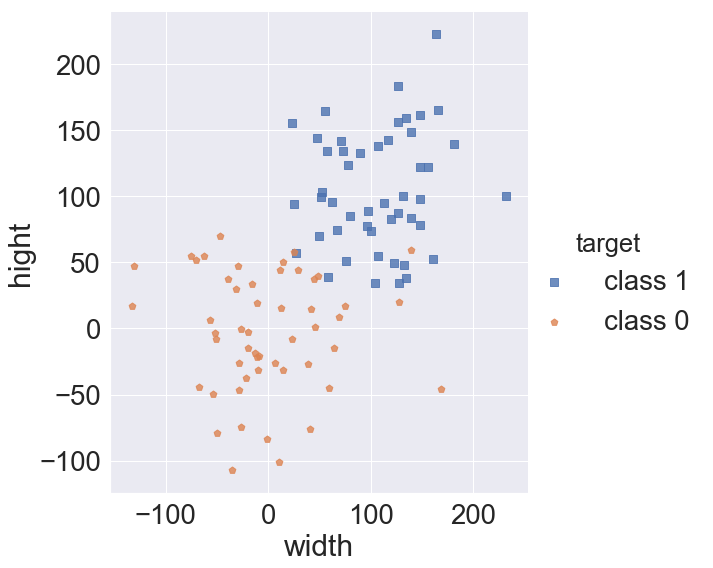

In [13]:
# Plot scatter with 2 classes
sns.lmplot('width',
           'hight',
           markers=['s','p'],   ## different maker for each hue in sns.lmplot ( shape of points )
           data=df,
           fit_reg=False, # try True here are see the difference
           hue='target',
           height=8,
           scatter_kws={'s':50}); ##  change the size of the markers

**Let's add a new point in the plot, notice a cross.**

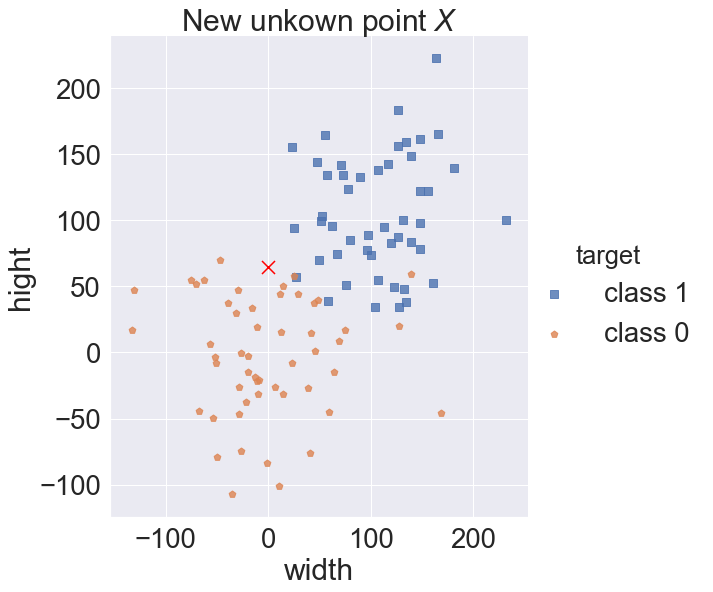

In [15]:
# Plot scatter with 2 classes
sns.lmplot('width',
           'hight',
           markers=['s','p'], # shape of point 
           data=df,
           fit_reg=False,
           hue='target', # clore the point depending what? here we make it depinding target
           height=8,
           scatter_kws={'s':50});

# Plot our new point
plt.title('New unkown point $X$')
plt.scatter(0, 65, color="red", marker="x", s=170);

# Think about the distance lines to all points to new unknown point!
# can you think about plotting these lines?

### Calculate the distances from every point to our unknown point "X"

In [16]:
from sklearn.metrics import pairwise_distances
# Wooow! "pairwise_distances" Compute the distance matrix from a vector array X and optional Y.

In [17]:
# Compute the distance from new point to all datframe points -- <shift+tab> docstring
p_distance = pairwise_distances([[0,65]], df[['width','hight']])#[0]
p_distance = p_distance[0] # it's only one columns
p_distance

array([ 64.46833862,  69.75425535, 158.32978621, 141.07618367,
       101.94006378,  26.05577933,  35.6657497 ,  63.54831664,
        34.80672939,  20.10382072, 152.73865548,  54.79694275,
        93.13058136,  70.90246171, 100.49796712, 146.9766837 ,
       129.39272581, 108.61175673,  89.1669459 ,  88.9018969 ,
        67.49918823,  38.32596695,  85.9796454 ,  34.95107438,
        97.2038741 ,  64.10525701,  50.92381362, 173.89256794,
        90.97725221,  81.88837388,  97.86588142,  76.72167071,
       140.73048066,  65.26431734, 148.45404473, 104.33898027,
       123.31775116, 131.62016256,  78.37938366, 139.01740777,
        47.43847498,  72.09652264,  47.15493794, 135.71105655,
       124.73821386,  99.71681282, 163.72500579,  76.07015971,
       104.46099347,  70.51921804,  96.7300754 , 131.79201135,
        23.59695647,  86.99264769, 135.75154511, 176.88244908,
       175.53975875,  96.8044818 , 142.28428486,  92.49918482,
       116.53522452, 162.50478817, 120.74349339,  84.37

In [19]:
# adding new column
df['distance'] = p_distance # its a new columns
df.sort_values('distance').head()
## what is pairwise_distances

,hight,width,target,distance
9,50.525764,13.952065,class 0,20.103821
52,44.088052,10.931916,class 0,23.596956
5,57.909333,25.072417,class 0,26.055779
81,56.975250,27.070735,class 1,28.235107
8,47.371991,-30.012693,class 0,34.806729


**Let's plot all the distances to the new point and see how it looks like.**

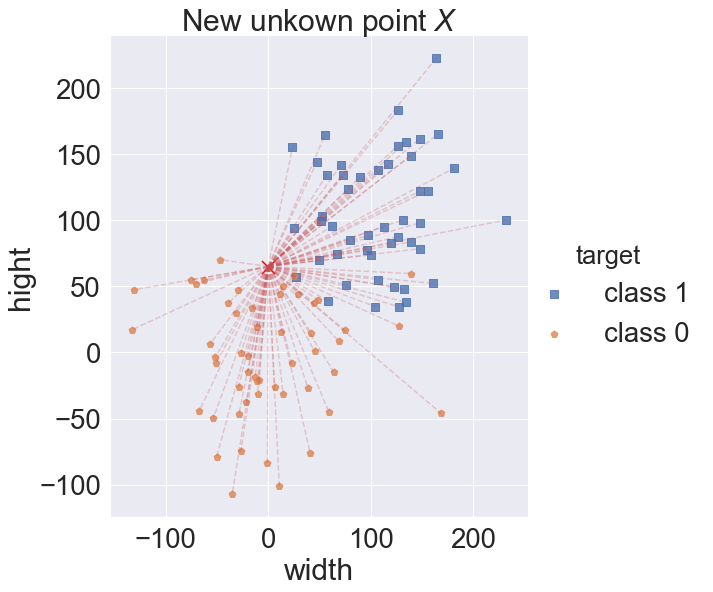

In [20]:
import matplotlib.pyplot as plt


# Plot scatter with 2 classes
sns.lmplot('width',
           'hight',
           markers=['s','p'],   ## here
           data=df,
           fit_reg=False,
           hue='target',
           height=8,
           scatter_kws={'s':50}); ## here

# Plot our new point
plt.title('New unkown point $X$')
plt.scatter(0, 65, color="red", marker="x", s=170);

# Plot distnace lines to all points to new unknown point!
for index, width, hight, target, distance in df.to_records(): # New to you, we will be able to loop in it
    plt.plot([0,hight], [65,width], '--' , alpha=.25, color='r' ) #[x1,x2] [y1,y2]


In [21]:
# Convert DataFrame to a NumPy record array.
df.to_records()[0:10]

rec.array([(0, 102.8573802 ,   52.18223308, 'class 1',  64.46833862),
           (1,  95.7611528 ,   62.60517246, 'class 1',  69.75425535),
           (2, 121.88669564,  147.75731812, 'class 1', 158.32978621),
           (3,  17.27589719, -132.75880238, 'class 0', 141.07618367),
           (4, -14.59763354,   63.68668101, 'class 0', 101.94006378),
           (5,  57.90933265,   25.07241658, 'class 0',  26.05577933),
           (6,  44.38742298,   29.10613974, 'class 0',  35.6657497 ),
           (7,  39.04288492,   58.00531634, 'class 1',  63.54831664),
           (8,  47.37199105,  -30.01269251, 'class 0',  34.80672939),
           (9,  50.52576424,   13.95206461, 'class 0',  20.10382072)],
          dtype=[('index', '<i8'), ('hight', '<f8'), ('width', '<f8'), ('target', 'O'), ('distance', '<f8')])

### Select only the "k" closest points
The closest "k" points are considered for voting.  In this case let's select 13, for our "K".

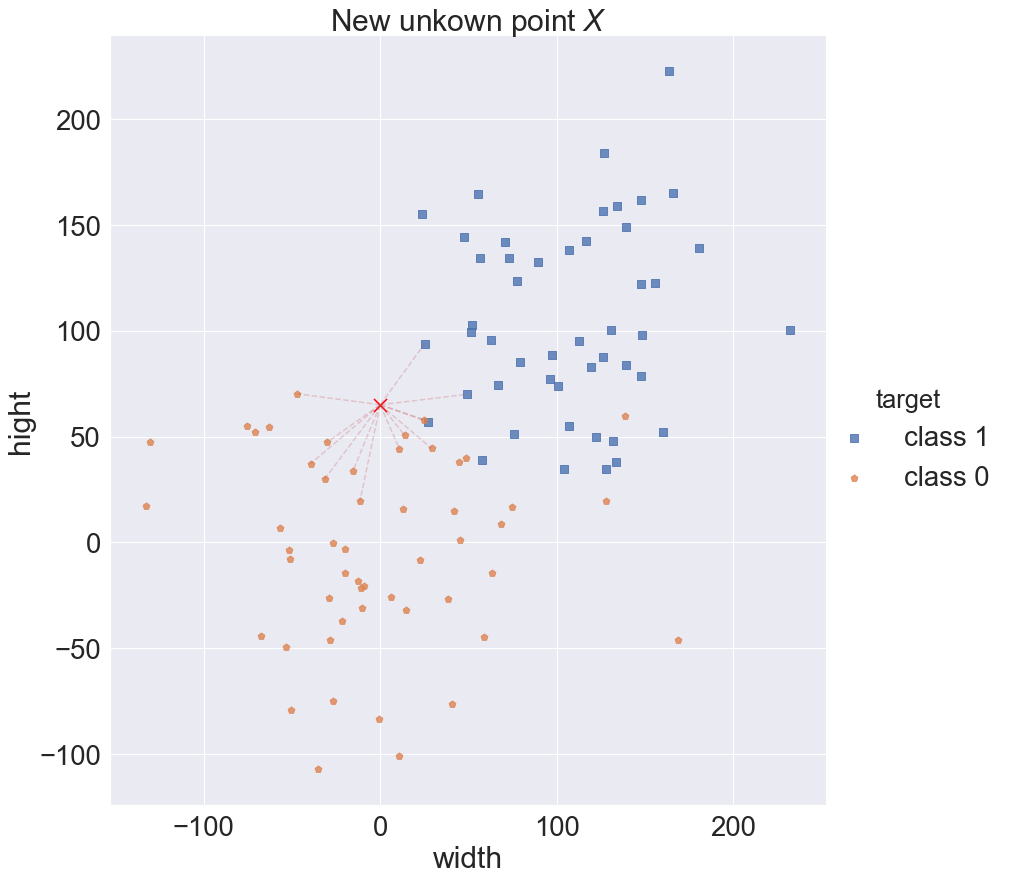

In [27]:
# Plot scatter with 2 classes
sns.lmplot('width',
           'hight',
           markers=['s','p'],   ## here
           data=df,
           fit_reg=False,
           hue='target',
           height=12,
           scatter_kws={'s':50}); ## here

# Plot our new point
plt.title('New unkown point $X$')
plt.scatter(0, 65, color="red", marker="x", s=170);


k = 13
# we can simply use head with k to grab first 13 rows!
for index, width, hight, target, distance in df.sort_values("distance").head(k).to_records():
    plt.plot([0,hight], [65,width], '--' , alpha=.25, color='r' )

# So, what will be the class of the new datapoint?

In [28]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [29]:
cdata = pd.read_csv("Coded_Data.csv",index_col=0)

In [30]:
cdata.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
1,10002447.0,63.4,33.0,46.2,10737.1,6.069523,44.3,36.1,0.037124,65.0,Y
2,1428768.0,54.7,31.1,50.5,15064.0,27.981961,39.4,56.8,0.005303,78.8,N
3,1315450.5,65.5,53.5,52.3,4070.0,16.128381,94.9,64.7,0.004882,67.9,N
4,1591740.0,75.6,37.9,50.5,22490.0,0.386872,82.3,77.3,0.005908,60.9,Y
5,2727404.4,51.8,36.4,40.9,28460.7,15.509855,65.1,36.2,0.010123,74.9,Y


In [44]:
#طريقة لحساب البيس لاين baseline 
y.value_counts(normalize= True)

N    0.5
Y    0.5
Name: Result, dtype: float64

In [42]:
X = cdata.drop('Result', axis = 1) # features in X
y = cdata['Result'] # targets/labels in y

In [38]:
# splitting data # bzلازم نسويها دائماً بهذا الترتيب  ونضع نسبة للاختبار ٣٠ ٪ تقريباً
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [40]:
len(X)

1000

In [41]:
len (X_train), len(y_train)

(700, 700)

In [45]:
# creating model instance "knn" 
knn = KNeighborsClassifier(n_neighbors=1)  # K = 1 meean the neerist one (me)
# splitting data 

knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [46]:
#Returns the mean accuracy on the given test data and labels.
knn.score(X_test, y_test)#, knn.score(X_train, y_train)

0.44333333333333336

## The metrics below, we will discuss in details in the evaluation lecture after LogR model along with other ways!

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print('Our k = 1 (n_neighbors=1) here\n')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Our k = 1 (n_neighbors=1) here

[[52 90]
 [81 77]]
              precision    recall  f1-score   support

           N       0.39      0.37      0.38       142
           Y       0.46      0.49      0.47       158

    accuracy                           0.43       300
   macro avg       0.43      0.43      0.43       300
weighted avg       0.43      0.43      0.43       300



In [26]:
### Elbow method to chose the k value

In [27]:
# Initializing an empty list to get the error rate for every k 
err_rate = []

# Let's run a for loop for k from 1 to 15, we can use range() method
for i in range(1,30):
    
    # Initializing knn for k = i
    knn_er = KNeighborsClassifier(n_neighbors=i)
    
    # fitting knn 
    knn_er.fit(X_train,y_train)
    
    # predicting for k = i
    prediction_i = knn_er.predict(X_test)
    
    # error rate for k = i -- appending to the list 'err_rate'
    # Avg of predictions and y_test if both not equal
    err_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error_Rate')

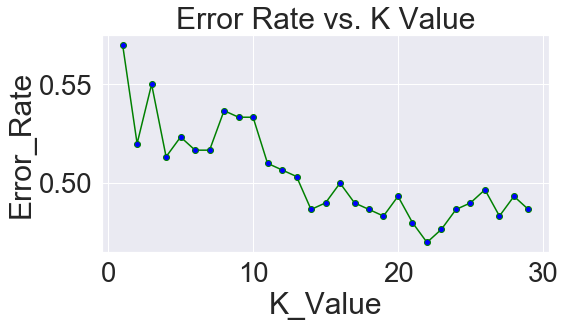

In [28]:
plt.figure(figsize=(8,4))
plt.plot(range(1,30), err_rate, color='green', marker='o', markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

In [29]:
# creating model instance "knn" 
knn = KNeighborsClassifier(n_neighbors=4) 
# splitting data 

knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [30]:
print('Our k = 4 (n_neighbors=1) here\n')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Our k = 4 (n_neighbors=1) here

[[ 89  53]
 [101  57]]
              precision    recall  f1-score   support

           N       0.47      0.63      0.54       142
           Y       0.52      0.36      0.43       158

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.49      0.49      0.48       300



### Plotting Accuracy - Alternative way.

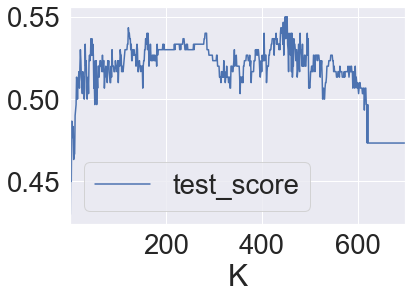

In [31]:
Ks = []
scores = []
for k in range(1 , X_train.shape[0]):
    knn_diff_k = KNeighborsClassifier(n_neighbors=k)
    knn_diff_k.fit(X_train , y_train)
    Ks.append(k)
    scores.append(knn_diff_k.score(X_test , y_test))
    
#plotting k and test scores
df_score = pd.DataFrame({'K' : Ks , 'test_score' :scores })
df_score.plot(x = 'K' , y = 'test_score');

## Well, the model is improved a bit!
To Do:
* Import StandardScaler and re-train your model using scaled features, compare the results. 

<br><br><br><br><br><br>

### What about all those edge cases?

Well that's a grand question!

#### What if we have an equal amount of votes per class, to predict a point?
- We can **weight the samples that are closer a point** to have more value in the voting process.
- Using an **odd quantity for $k$ can help** avoid classes having the same score towards predicted points.

#### KNN seems pretty simple.  Is it?

If we're considering uniform distance value of distance (no weighted assumptions), with larger datasets, calculating the distances to known vs unknown points becomes **very inefficient with larger datasets**.  Even with weighted distances, KNN is still not very efficient.

## ADVANTAGES AND DRAWBACKS

### Benefits
- Simple to understand and explain
- Model training is fast
- Can be used for classification and regression
- Non-linear, which may be common (imagine age vs income)

### Drawbacks
- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data
- Accuracy is (generally) not competitive with the best supervised learning methods

<br><br><br><br><br><br><br><br>

## KNN on IRIS dataset in sklearn

We will load up a multinomial dataset having 3 classes.
- Inspect dataset using a pairplot in multiple dimensions
- Implement KNN in sklearn
- Search range of $K$ for optimal accuracy 

In [32]:
sns.set(font_scale=1.5) ## update font_scale to something more readable

In [33]:
# load iris dataset
iris = sns.load_dataset("iris")

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [36]:
#iris =

###  Which features seem to create the clearest difference between classes?

In [37]:
# check correlation
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [38]:
# plot pairplot for all features


In [39]:
# Predictors X, and target y for our model


### Quick context:
**Petal** is the bright colorful bit of the flower.  
**Sepal** is the green bit that protects the petal before it blooms, and supports it afterwards.

<img src="Petal-sepal.jpg" alt="Image courtesy of Wikipedia" height="350" width="350">

In [40]:
# Do train test split with 10% as test data


In [41]:
# Do Scaling for data


In [42]:
# Intialize our model


In [43]:
# Score our model

In [44]:
# get best K


In [45]:
# save your best model, load it and see if you are getting same score

# Self-Study
### Time Permitting - Explore Bias / Variance with "K" with new data on  your own!

Generally fewer number of neighbors will make your model learn to predict on the specific variance of our data (as a result of variance) and the boundaries / edges of classes will look more jagged but too many neighbors will not capture the general characteristics of your data (smoother edges and less distinction between classes -- less variance -- less distinction between classes). 

- Lower k will increase variance and decrease bias
- Higher k will decrease variance and increase bias.

A good way to choose K is to iterate on a few different models score, but also look at precion / recall / F1 in addition to score for each K to see how it  performs on accuracy, but also the other metrics that relate to each class.  Not only is overall accuracy important to understand, but also the rate of misclassfication / performance per each class.

> <img src="https://snag.gy/26k4Qa.jpg" width="500">
> Mainly, you're looking to find that "sweet spot" between bias and variance.  With a K too high or low, you're going to hit one side or the other of this trade-off.


<img src="1nearestneigh.png" alt="1 nearest neigh" height="350" width="350">
<img src="20nearestneigh.png" alt="20 nearest neigh" height="350" width="350">

### Good to know:  Note on parametric vs. nonparametric methods

Thus far, all of our tests and methods have been **parametric**. That is, we have assumed a certain **distribution for our data**. In linear regression our parameters are the coefficients in our model, and our estimate of the target is calculated from these parameters.

There are alternatives in the case where we cannot assume a particular distribution for our data or choose not to. These methods are **nonparametric** 

=> When we make **no assumptions** about the distribution for our data, we call our data **nonparametric**. For nearly every parametric test, there is a nonparametric analog available. The KNN model is an example of a **nonparametric model**. You can see that there are no coefficients for the different predictors and our estimate is not represented by a formula of our predictor variables.

## Reading -- Optional
[Calculating Euclidean and Manhattan distance](https://math.stackexchange.com/questions/139600/how-do-i-calculate-euclidean-and-manhattan-distance-by-hand)<br>
[Dealing with ties](https://stats.stackexchange.com/questions/45580/dealing-with-ties-weights-and-voting-in-knn)<br>
[Dealing with ties](https://stats.stackexchange.com/questions/25926/dealing-with-lots-of-ties-in-knn-model)<br>
[How scikitlearn resolve ties-please explore the documentation for any update](https://stats.stackexchange.com/questions/144718/how-does-scikit-learn-resolve-ties-in-the-knn-classification)<br>
[Breaking Ties in K-NN Classification -- A very good read on LinkedIn](https://www.linkedin.com/pulse/breaking-ties-k-nn-classification-nicholas-pylypiw)<br>
[Manhattan Distance - NIST](https://xlinux.nist.gov/dads/HTML/manhattanDistance.html)